## Alcohol consume analysis

In [8]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline
import urllib.request

In [5]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sake_dataJ.txt'

urllib.request.urlretrieve(url, 'alcohol.txt')

('alcohol.txt', <http.client.HTTPMessage at 0x12b965e10>)

In [65]:
df = pd.read_csv('alcohol.txt', sep='\t')
df.iloc[:,0:].head()

,Pref,Sake,Shochu,Bear,Wine,Whisky
0,Hokkaido,46476000,50642000,315300000,10488000,9749000
1,Aomori,17273000,11503000,83164000,1774000,3122000
2,Iwate,17120000,10220000,67803000,1458000,1870000
3,Miyagi,27859000,11768000,109850000,2824000,5049000
4,Akita,24153000,6240000,67894000,1242000,2099000


### Principal Component Analysis

In [21]:
# Standardize data

std_sc = StandardScaler()
std_data = std_sc.fit_transform(df.iloc[:, 1:])
std_data_df = pd.DataFrame(std_data, columns=df.columns[1:], index=df.iloc[:,0])
display(std_data_df)

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,0.820201,2.171311,1.069321,1.040388,1.220387
Aomori,-0.442416,-0.212953,-0.393327,-0.302196,-0.128180
Iwate,-0.449031,-0.291110,-0.490113,-0.350882,-0.382957
Miyagi,0.015279,-0.196810,-0.225183,-0.140420,0.263956
Akita,-0.144953,-0.533563,-0.489540,-0.384162,-0.336357
Yamagata,-0.299867,-0.544102,-0.532159,-0.312672,-0.261674
Fukushima,0.151775,-0.233482,-0.286477,-0.285094,0.011214
Ibaraki,0.085883,0.006473,-0.117968,-0.200970,-0.150565
Tochigi,-0.354042,-0.263027,-0.383069,-0.334705,-0.356503


In [25]:
# Execute PCA
pca = PCA()
pca.fit(std_data_df)

# Mapping data into Principal Component space.

pca_cor = pca.transform(std_data_df)

# Covariance matrix

pca.get_covariance()

# Eigenvalue vector

print('Eigenvalue vector')
eig_vec = pd.DataFrame(pca.components_.T, index=std_data_df.columns, \
    columns=['PC{}'.format(x+1) for x in range(len(std_data_df.columns))])
display(eig_vec)

Eigenvalue vector


,PC1,PC2,PC3,PC4,PC5
Sake,0.444046,-0.489969,-0.409678,0.619715,-0.104259
Shochu,0.415421,0.832279,-0.341454,0.127159,-0.044465
Bear,0.457535,-0.237431,-0.252813,-0.741206,-0.347832
Wine,0.453074,0.050400,0.787363,0.172183,-0.377620
Whisky,0.464365,-0.091263,0.178094,-0.144047,0.850629


In [28]:
# Eigenvalue

eig = pd.DataFrame(pca.explained_variance_, index=['PC{}'.format(x+1) for x in range(len(std_data_df.columns))], columns=['Eigenvalue']).T
eig

,PC1,PC2,PC3,PC4,PC5
Eigenvalue,4.658704,0.297329,0.099622,0.04001,0.015445


In [32]:
# Standard deviation od Principal component

dv = np.sqrt(eig)
dv = dv.rename(index={'Eigenvalue':'Standard deviation of Principal Component'})
display(dv)

,PC1,PC2,PC3,PC4,PC5
Standard deviation of Principal Component,2.158403,0.545279,0.315629,0.200026,0.124279


In [38]:
# Contribution rate

ev = pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x+1)  for x in range(len(std_data_df.columns))], columns=['Contribution rate']).T
display(ev)

,PC1,PC2,PC3,PC4,PC5
Contribution rate,0.911486,0.058173,0.019491,0.007828,0.003022


In [40]:
# Culmulated contribution rate

t_ev = pd.DataFrame(pca.explained_variance_ratio_.cumsum(), index=["PC{}".format(x+1) for x in range(len(std_data_df.columns))], columns=['Cumlmulated contribution rate']).T
display(t_ev)

,PC1,PC2,PC3,PC4,PC5
Cumlmulated contribution rate,0.911486,0.969659,0.98915,0.996978,1.0


In [66]:
# Principal Component score

cor = pd.DataFrame(pca_cor, columns=["PC{}".format(x+1) for x in range(len(std_data_df.columns))])
cor

,PC1,PC2,PC3,PC4,PC5
0,2.793544,1.092433,-0.311253,-0.004850,0.091221
1,-0.661318,0.129389,0.092634,-0.043283,0.197488
2,-0.881375,0.111359,0.062792,0.042735,0.036983
3,-0.119051,-0.148988,0.054319,0.089149,0.363038
4,-0.840247,-0.245484,0.002956,0.187478,0.068068
5,-0.865843,-0.171446,0.150383,0.123276,0.136043
6,-0.284632,-0.216061,-0.132505,0.226003,0.211400
7,-0.174121,-0.005071,-0.192622,0.128570,-0.020393
8,-0.758938,0.061176,0.004675,0.024805,0.004991
9,-0.584796,0.316993,-0.043094,0.069669,-0.079957


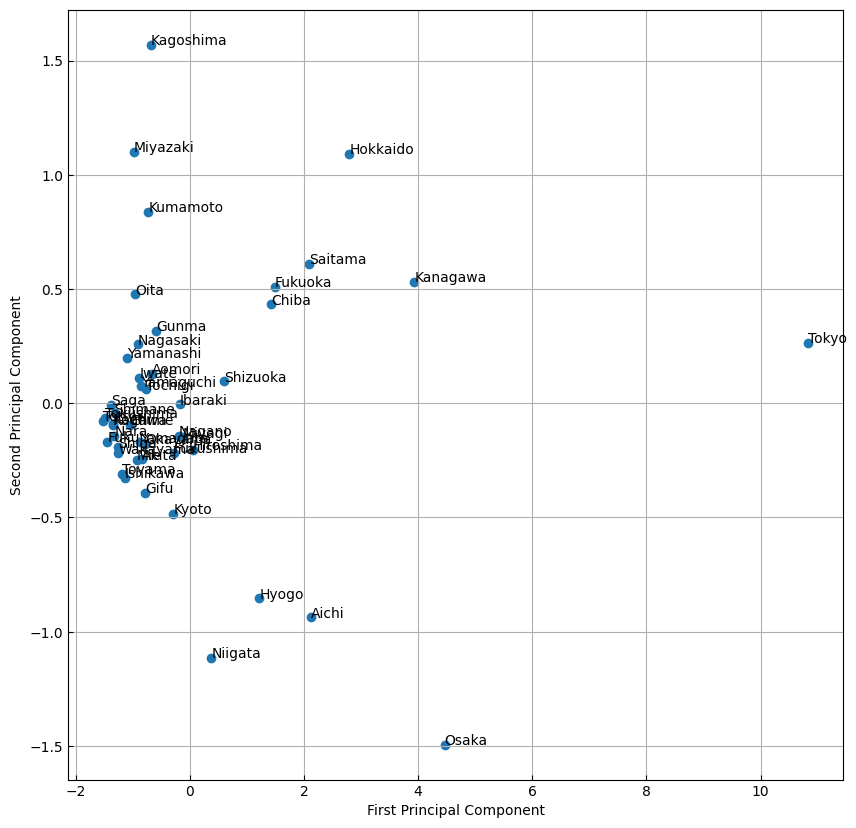

In [74]:
plt.figure(figsize=(10,10))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.grid(True)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(cor.iloc[:, 0], cor.iloc[:, 1])

for i in range(len(std_data_df.index)):
    plt.text(cor.iloc[i, 0], cor.iloc[i, 1], std_data_df.index[i])

Text(0, 0.5, 'Second Principal Component')

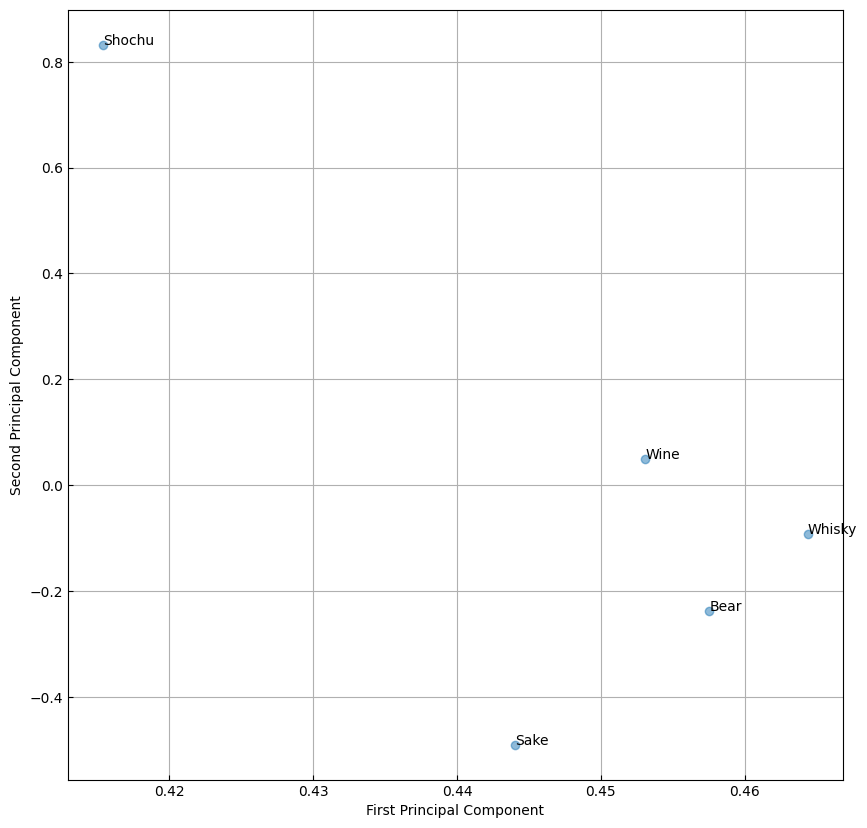

In [75]:
plt.figure(figsize=(10,10))

for x, y, name in zip(pca.components_[0], pca.components_[1], std_data_df.columns):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.5)
plt.grid()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

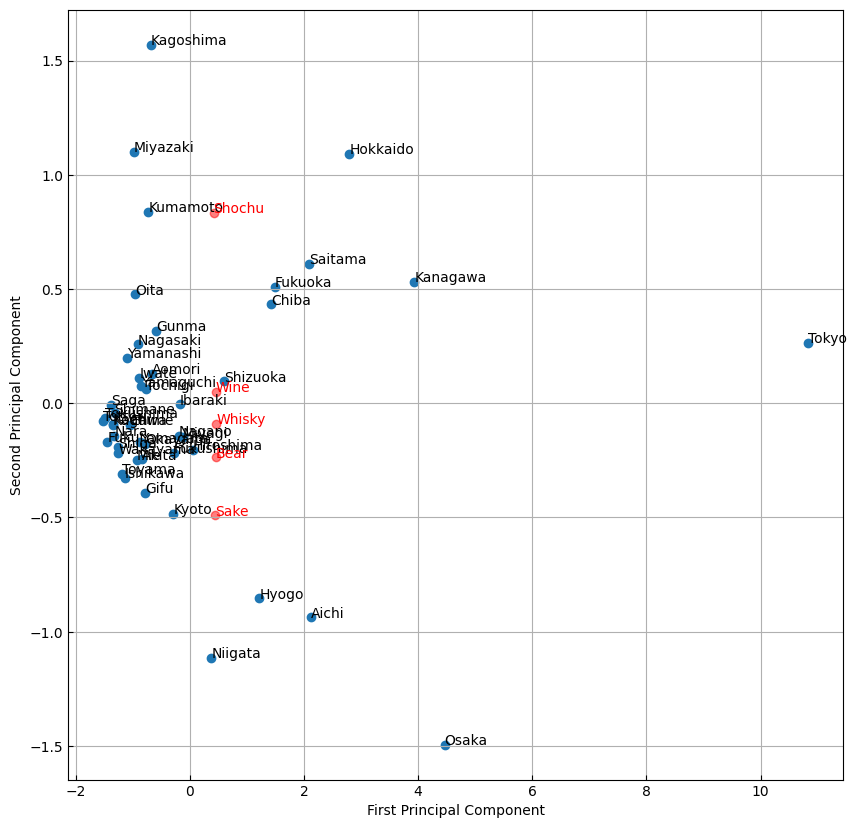

In [79]:
plt.figure(figsize=(10,10))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.grid(True)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.scatter(cor.iloc[:, 0], cor.iloc[:, 1])

for i in range(len(std_data_df.index)):
    plt.text(cor.iloc[i, 0], cor.iloc[i, 1], std_data_df.index[i])
    
for x, y, name in zip(pca.components_[0], pca.components_[1], std_data_df.columns):
    plt.text(x, y, name, color='r')
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.5, color='r')